In [3]:
import pandas as pd
import yfinance as yf

def get_mutual_fund_info(fund_symbol):
  fund = yf.Ticker(fund_symbol)
  fund_info = fund.info
  return fund_info

def calculate_score(fund_info):
  score = 0
  # Add points for high returns
  score += fund_info["returns"]["annualized_return_10y"]
  # Add points for low fees
  score -= fund_info["expense_ratio"]
  # Add points for low volatility
  score -= fund_info["beta"]
  return score

def main():
  fund_symbol = "FSHOX"
  fund_info = get_mutual_fund_info(fund_symbol)
  score = calculate_score(fund_info)
  print(f"The score for {fund_symbol} is {score}")

if __name__ == "__main__":
  main()


KeyError: 'returns'

In [6]:
fund_symbol = "FSHOX"
fund = yf.Ticker(fund_symbol)
fund.info


{'address1': 'Boston MA 02109',
 'address2': '82 Devonshire Street',
 'address3': 'Fidelity Select Portfolios',
 'longBusinessSummary': "The fund normally invests at least 80% of assets in securities of companies principally engaged in the design and construction of residential, commercial, industrial, and public works facilities, as well as companies engaged in the manufacture, supply, distribution, or sale of construction and housing products or services. It invests in domestic and foreign issuers. The fund uses fundamental analysis of factors such as each issuer's financial condition and industry position, as well as market and economic conditions to select investments. It invests primarily in common stocks. The fund is non-diversified.",
 'maxAge': 86400,
 'priceHint': 2,
 'previousClose': 102.670006,
 'regularMarketPreviousClose': 102.670006,
 'averageVolume': 0,
 'averageVolume10days': 0,
 'averageDailyVolume10Day': 0,
 'yield': 0.0067000003,
 'ytdReturn': 0.24386999,
 'totalAsse

In [11]:
import yfinance as yf
import pandas as pd
import numpy as np

def evaluate_mutual_fund(ticker_symbol):
    try:
        # Fetch historical data for the mutual fund
        fund_data = yf.download(ticker_symbol, start="2020-01-01", end="2023-01-01")

        # Calculate annual returns
        fund_data['Returns'] = fund_data['Adj Close'].pct_change()

        # Calculate mean return and standard deviation of returns
        mean_return = fund_data['Returns'].mean()
        std_dev = fund_data['Returns'].std()

        # Calculate Sharpe Ratio
        risk_free_rate = 0.03  # You can adjust this based on current rates
        sharpe_ratio = (mean_return - risk_free_rate) / std_dev

        # Calculate total return over the period
        total_return = (fund_data['Adj Close'][-1] / fund_data['Adj Close'][0]) - 1

        # Get expense ratio (You may need to find this information from other sources)
        expense_ratio = 1

        # Evaluate the mutual fund
        if sharpe_ratio > 1 and total_return > 0 and expense_ratio < 0.03:
            print("This mutual fund seems to be a good investment.")
        else:
            print("This mutual fund may not be a good investment.")
        print(ticker_symbol,mean_return,std_dev)
    except Exception as e:
        print("Error:", str(e))

if __name__ == "__main__":
    ticker_symbol = "AMAGX"  # Replace with the ticker symbol of the mutual fund you want to evaluate
    evaluate_mutual_fund(ticker_symbol)


[*********************100%***********************]  1 of 1 completed
This mutual fund may not be a good investment.
AMAGX 0.0005564063341850861 0.015347137331348057


In [14]:
import pandas as pd
import requests
import BeautifulSoup

def get_zacks_mf_rank(fund_symbol):
  url = "https://www.zacks.com/funds/mutual-funds/{}/quote".format(fund_symbol)
  response = requests.get(url)
  soup = BeautifulSoup(response.content, "html.parser")
  rank_element = soup.find("span", class_="zacks_rank")
  rank = rank_element.text
  return rank

def main():
  fund_symbol = "FSHOX"
  rank = get_zacks_mf_rank(fund_symbol)
  print(f"The Zacks MF rank for {fund_symbol} is {rank}")

if __name__ == "__main__":
  main()


ModuleNotFoundError: No module named 'BeautifulSoup'

In [15]:
import yfinance as yf

def download_fshox_performance_data():
  fund_symbol = "FSHOX"
  fund = yf.Ticker(fund_symbol)
  performance_data = fund.history(start="2010-01-01", end="2023-07-01")
  return performance_data

def main():
  performance_data = download_fshox_performance_data()
  print(performance_data)

if __name__ == "__main__":
  main()


                                Open       High        Low      Close  Volume  \
Date                                                                            
2010-01-04 00:00:00-05:00  13.218264  13.218264  13.218264  13.218264       0   
2010-01-05 00:00:00-05:00  13.299663  13.299663  13.299663  13.299663       0   
2010-01-06 00:00:00-05:00  13.353927  13.353927  13.353927  13.353927       0   
2010-01-07 00:00:00-05:00  13.760923  13.760923  13.760923  13.760923       0   
2010-01-08 00:00:00-05:00  13.756401  13.756401  13.756401  13.756401       0   
...                              ...        ...        ...        ...     ...   
2023-06-26 00:00:00-04:00  95.150002  95.150002  95.150002  95.150002       0   
2023-06-27 00:00:00-04:00  97.269997  97.269997  97.269997  97.269997       0   
2023-06-28 00:00:00-04:00  96.629997  96.629997  96.629997  96.629997       0   
2023-06-29 00:00:00-04:00  97.230003  97.230003  97.230003  97.230003       0   
2023-06-30 00:00:00-04:00  9

OSError: Unable to open boundary dataset file. Only the 'crude', 'low' and
'intermediate' resolution datasets are installed by default. If you
are requesting a 'high' or 'full' resolution dataset, you need to
install the `basemap-data-hires` package.

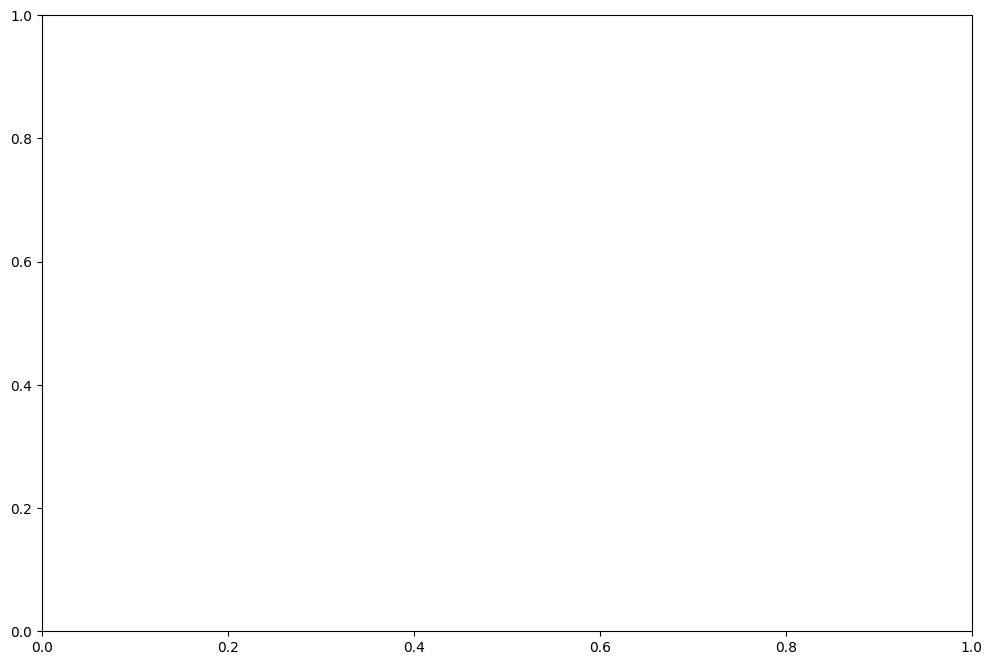

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Create a figure and axes
fig, ax = plt.subplots(figsize=(12, 8))

# Create a Basemap instance
m = Basemap(projection='lcc', resolution='h', width=1000000, height=500000, lat_0=30, lon_0=-90)

# Plot the coastlines
m.drawcoastlines()

# Plot the gridlines
m.drawparallels(np.arange(-90, 90, 10), labels=True, linewidth=0.75, color='black')
m.drawmeridians(np.arange(-180, 180, 10), labels=True, linewidth=0.75, color='black')

# Add a title
ax.set_title('Basemap Example')

# Show the plot
plt.show()
